Error:Failed to load imageC:\python data science\CNN\Model\mobile\VideoCapture_20240703-224354.jpg


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.7822 - loss: 0.4784 - val_accuracy: 0.9665 - val_loss: 0.1360
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.9372 - loss: 0.2072 - val_accuracy: 0.9232 - val_loss: 0.1818
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9503 - loss: 0.1503 - val_accuracy: 0.9789 - val_loss: 0.0658
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9535 - loss: 0.1363 - val_accuracy: 0.9827 - val_loss: 0.0642
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9633 - loss: 0.1075 - val_accuracy: 0.9727 - val_loss: 0.0855
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.9672 - loss: 0.0979 - val_accuracy: 0.9628 - val_loss: 0.0919
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.9638 - loss: 0.1055 - val_accuracy: 0.9888 - val_loss: 0.0496
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.9725 - loss: 0.0714 - val_accuracy: 0.97

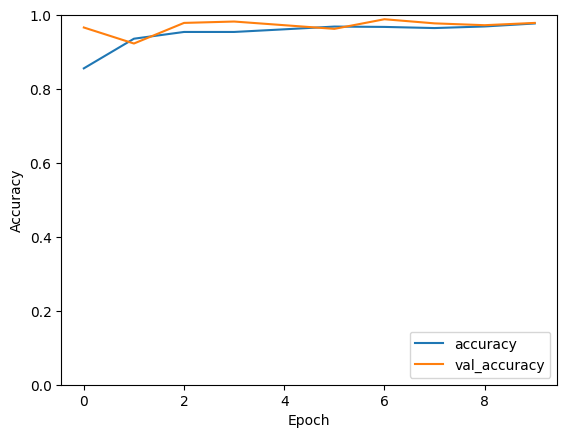

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (1, 64, 64, 4)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 64, 64, 4), dtype=float32)
  • training=False
  • mask=None

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import requests
from io import BytesIO
from sklearn.model_selection import train_test_split
from PIL import Image

calculator_dir=r'C:\python data science\CNN\Model\calculator'
mobil_dir=r'C:\python data science\CNN\Model\mobile'
#image Size
img_size=64

#function to load images and labels
def load_images_and_labels():
    images=[]
    labels=[]

    for label, directory in enumerate([calculator_dir, mobil_dir]):
        for filename in os.listdir(directory):
            img_path=os.path.join(directory,filename)
            img= cv2.imread(img_path)
            if img is not None:
                img= cv2.resize(img, (img_size,img_size))
                images.append(img)
                labels.append(label)
            else:
                print(f'Error:Failed to load image{img_path}')
    return np.array(images),np.array(labels) #label for class cal=0 mob=1

#load images and labels
images, labels =load_images_and_labels()
labels= to_categorical(labels,num_classes=2)

#normalize the image
images=images/255.0

#split data into training and validation sets

#from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val =train_test_split(images,labels,test_size=0.2, random_state=42)

# build the CNN model

def build_model():
    model=Sequential()
    model.add(Conv2D(32,(3,3), activation='relu',input_shape=(img_size,img_size,3)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64,(3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2,activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model
model=build_model()

#Data augmentation

datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

#Train the Model
history=model.fit(datagen.flow(X_train,y_train, batch_size=32),epochs=10, validation_data=(X_val, y_val)) # augmentation train data
# save the model
os.makedirs('Models',exist_ok=True)
model.save('Models/image_classifier.h5')





#plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()

#inference section

def predict_image_from_url(url):
    #response=requests.get(url)
    #img=Image.open(BytesIO(response.content))
    
    img=Image.open(url)
    img=img.resize((img_size,img_size))
    img_array=np.array(img)
    img_array=img_array/255.0
    img_array=np.expand_dims(img_array, axis=0)

    model=load_model('Models/image_classifier.h5')
    prediction=model.predict(img_array)
    labels=['Calculator','Mobile']
    predicted_label=labels[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f'Prediction:{predicted_label}')
    plt.axis('off')
    plt.show()

#Example URL for Testing
url=r'C:\python data science\CNN\Model\calculator\calc1.png'
predict_image_from_url(url)



In [11]:
import cv2

In [ ]:
! pip install opencv-python

^C


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.0/38.8 MB 653.6 kB/s eta 0:01:00
   ---------------------------------------- 0.1/38.8 MB 544.7 kB/s eta 0:01:12
   ---------------------------------------- 0.1/38.8 MB 491.5 kB/s eta 0:01:19
   ---------------------------------------- 0.1/38.8 MB 491.5 kB/s eta 0:01:19
   ---------------------------------------- 0.1/38.8 MB 491.5 kB/s eta 0:01:19
   ---------------------------------------- 0.1/38.8 MB 308.0 kB/s eta 0:02:06
   ---------------------------------------- 0.1/38.8 MB 308.0 kB/s eta 0:02:06
   ---------------------------------------- 0.2/38.8 MB 436.9 kB/s eta 0:01:29
   ---------------------------------------- 0.2/38.8 MB 436.9 kB/s eta 0:01:29
   ---------------------------------------- 0.2/38.8 MB 436.9 kB/s eta 0


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ------------------------------------ --- 35.8/38.8 MB 59.0 kB/s eta 0:00:52
   ------------------------------------ --- 35.8/38.8 MB 59.1 kB/s eta 0:00:52
   ------------------------------------ --- 35.8/38.8 MB 59.1 kB/s eta 0:00:52
   ------------------------------------ --- 35.8/38.8 MB 60.4 kB/s eta 0:00:50
   ------------------------------------ --- 35.8/38.8 MB 60.4 kB/s eta 0:00:50
   ------------------------------------ --- 35.8/38.8 MB 60.4 kB/s eta 0:00:50
   ------------------------------------ --- 35.8/38.8 MB 60.6 kB/s eta 0:00:50
   ------------------------------------ --- 35.8/38.8 MB 60.6 kB/s eta 0:00:50
   ------------------------------------ --- 35.8/38.8 MB 60.6 kB/s eta 0:00:50
   ------------------------------------ --- 35.8/38.8 MB 60.6 kB/s eta 0:00:50
   ------------------------------------ --- 35.8/38.8 MB 60.6 kB/s eta 0:00:50
   ------------------------------------ --- 35.9/38.8 MB 60.7 kB/s eta 0:00:50
   ------------------------------------ --- 35.9/38.

In [26]:
import cv2
image=cv2.imread(r'calculator')
if image is None:
    print("Error: Image not loaded correctly.")
else:
    print("Image loaded successfully. Shape:", image.shape)


Error: Image not loaded correctly.


In [28]:
! pip3 install requests


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
